---Data Pengamatan---
L 	 t1 	 t2 	 t3
0.755 	 16.29 	 17.18 	 16.33
0.65 	 13.0 	 13.37 	 13.73
0.56 	 11.31 	 10.67 	 10.48
0.475 	 9.66 	 9.71 	 9.85

---Koordinat sumbu x dan y---
x 	 y
0.15 	 3.56
0.26 	 5.54
0.34 	 6.41
0.11 	 1.98
0.2 	 2.85
0.09 	 0.87


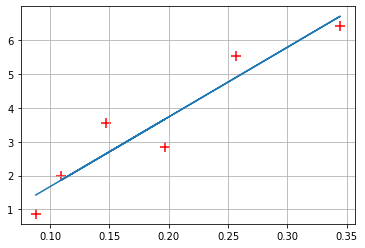

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc

# menghitung inersia pusat masssa
# data diambil dari praktikum secara langsung
m = 4.7823 
L0 = np.array([0.801, 0.711, 0.633, 0.564])
T0 = np.array([1.825, 1.736, 1.650, 1.584])

ipm = (T0**2 * m * 9.8 * L0) / (4*np.pi**2) - m*L0**2 
ipm = np.mean(ipm)
ipm = round(ipm, 3)

# menghitung periode untuk panjang tali yang lain
g = 9.8
dg = 1.0    # deviasi standar
dt = 0.3    # deviasi standar waktu
n = 5       # banyak ayunan

L = np.array([0.755, 0.650, 0.560, 0.475])
g = np.random.normal(g, dg, 4)
T = (4*np.pi**2 * (ipm + m*L**2)) / (m*g*L)
t = n * T

# data pengamatan
print("---Data Pengamatan---") 
print("L \t t1 \t t2 \t t3")
for i in range(len(t)):
  x = np.random.normal(t[i], dt, 3)
  x1 = round(x[0], 2)
  x2 = round(x[1], 2)
  x3 = round(x[2], 2)
  print(L[i], "\t", x1, "\t", x2, "\t", x3)

def x(L2, L1):
  return L2**2 - L1**2

def y(L2, L1, T2, T1):
  return T2**2 * L2 - T1**2 * L1

xa = np.array([x(L[0], L[1]),
      x(L[0], L[2]),
      x(L[0], L[3]),
      x(L[1], L[2]),
      x(L[1], L[3]),
      x(L[2], L[3]),
])

ya = np.array([y(L[0], L[1], T[0], T[1]),
      y(L[0], L[2], T[0], T[2]),
      y(L[0], L[3], T[0], T[3]),
      y(L[1], L[2], T[1], T[2]),
      y(L[1], L[3], T[1], T[3]),
      y(L[2], L[3], T[2], T[3]),
])

print("\n---Koordinat sumbu x dan y---")
print("x \t y")
for i in range(len(xa)):
  print(round(xa[i], 2), "\t", round(ya[i], 2))

# membuat visualisasi titik dan garis
def f(x, a, b):
  return a * x + b
opt, cov =sc.curve_fit(f, xa, ya)
a = opt[0]
b = opt[1]
yb = f(xa, a, b)

plt.scatter(xa, ya, color="red", marker="+", s=100)
plt.plot(xa, yb)
plt.grid()